<a href="https://colab.research.google.com/github/JavZon/Regression-Algorithms/blob/main/Sales_Sim_Lin_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


The above table shows the number of advertisements given by **MohirDev LLC** in various media (TV, Radio, Newspaper) and the corresponding sales (Sales).
**Task:**

Find out exactly what type of media advertising affects sales growth.
Build a prediction model using the **Simple Linear Regression** algorithm based on the found relationship.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.corrwith(df['Sales']).sort_values(ascending=False)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
dtype: float64

At first glance the most correlated column is **TV column**. But let's visualize all the columns with **'Sales'** column and then see the correlation between them

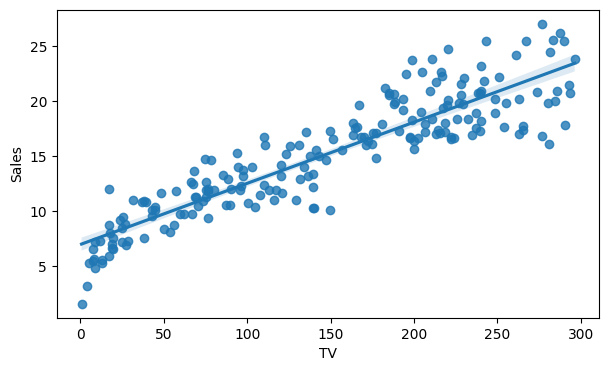

In [7]:
# Correlation between TV and Sales
plt.figure(figsize=(7,4))
sns.regplot(x='TV', y='Sales', data=df)
plt.show()

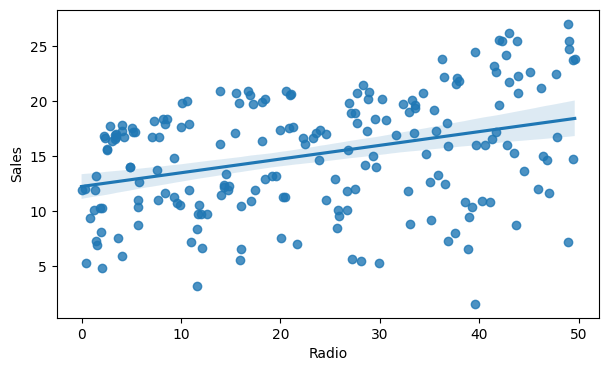

In [8]:
# Correlation between Radio and Sales
plt.figure(figsize=(7,4))
sns.regplot(x='Radio', y='Sales', data=df)
plt.show()

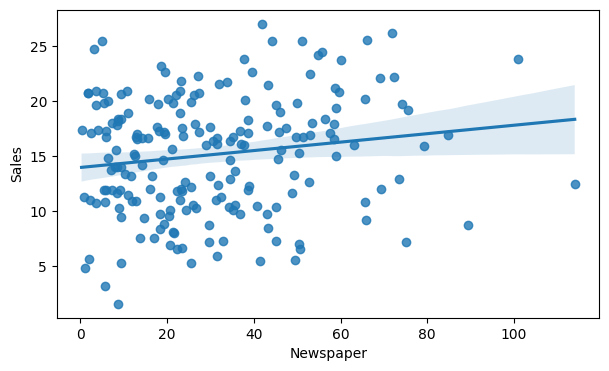

In [9]:
# Correlation between Newspaper and Sales
plt.figure(figsize=(7,4))
sns.regplot(x='Newspaper', y='Sales', data=df)
plt.show()

So as the plots illustrate the most correlated column is **TV** column.

In [10]:
df.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


Based on the illustrations we only choose TV column for our Simple Linear Algorithm task. As prediction requires 2D array we convert **TV** column into an array.

In [11]:
X=df['TV'].values.reshape(-1,1)
Y=df['Sales'].copy()

In [12]:
type(X)

numpy.ndarray

Now we split our dataset into train and test sets

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"Y_train shape : {Y_train.shape}")
print(f"Y_test shape : {Y_test.shape}")

X_train shape : (180, 1)
X_test shape : (20, 1)
Y_train shape : (180,)
Y_test shape : (20,)


In [15]:
print(X_train[:5])
print(Y_train.head())
print(X_test[:5])
print(Y_test.head())

[[229.5]
 [ 67.8]
 [ 38. ]
 [250.9]
 [ 69. ]]
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
Name: Sales, dtype: float64
[[163.3]
 [195.4]
 [292.9]
 [ 11.7]
 [220.3]]
95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64


In [17]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train, Y_train)

LinearRegression()

Firstly,

In [18]:
# Simple linear regression formula : y=c+mx   where c=intercept, m=slope

coef=LR_model.coef_
intercept=LR_model.intercept_

print(f"Intercept : {intercept}")
print(f"Slope : {coef}")
print(f"Simple linear regression formula : y={intercept}+{coef}x")

Intercept : 7.044916461655207
Slope : [0.05513263]
Simple linear regression formula : y=7.044916461655207+[0.05513263]x


In [20]:
y_test_pred = LR_model.predict(X_test)
y_test_pred

array([16.04807507, 17.81783251, 23.19326401,  7.68996824, 19.19063502,
       11.18537703, 18.99767081,  9.801548  , 19.30641354, 16.69864011,
        8.78159433, 10.14337031, 19.97351838,  7.34263267, 14.73591845,
       16.42849022,  7.44738467, 17.9391243 , 11.19640356, 20.13340301])

In [21]:
y_train_pred = LR_model.predict(X_train)
y_train_pred

array([19.69785522, 10.78290883,  9.13995643, 20.87769352, 10.84906798,
        9.99451221, 18.81573313, 14.72489193, 11.85248186,  7.50803056,
       18.06041609, 10.86009451, 18.01079672,  7.97665792, 22.52064592,
       20.17750911,  9.70782253, 22.1347175 , 13.50646079,  8.56106381,
       13.44030163, 16.80339211,  9.42113285, 10.47967936, 19.39462575,
        9.15098296, 10.93728019, 15.16595297, 12.81178964, 11.25153619,
       11.35628819, 16.32925148,  7.52457035,  7.47495098, 11.25704945,
       14.17907888, 11.09165156, 23.01683959,  8.12551602, 17.9391243 ,
       22.71912339, 17.23893989, 13.26939048,  8.35707307, 23.07197223,
        8.1144895 , 23.23185685,  8.07589666, 14.44922877,  8.45631181,
       12.58023259, 11.46655345, 17.4319041 , 16.80339211, 13.97508815,
       18.60071587, 14.9233694 , 17.23893989, 19.30641354, 20.37047332,
        7.99319771, 13.68839847, 11.99031344, 17.5807622 , 11.20743008,
       17.69654073, 11.76978292, 21.75981561,  9.22265538, 21.45

Scatterplot using y_train_pred

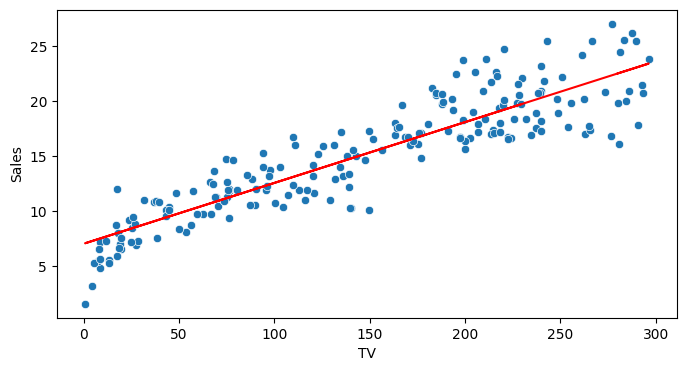

In [22]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.plot(X_train, y_train_pred, color='red')
plt.show()

Ordinary **regplot**

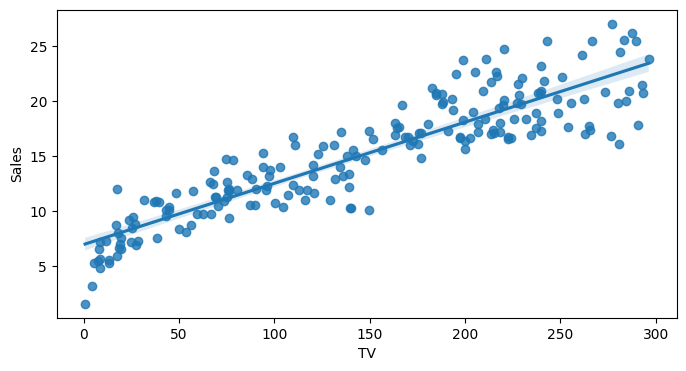

In [23]:
plt.figure(figsize=(8,4))
sns.regplot(x='TV', y='Sales', data=df)
plt.show()

Scatterplot using **y=c+mx** formula, where c=intercept, m=slope

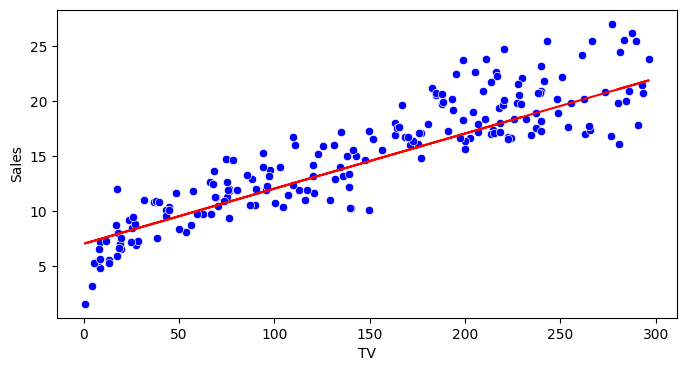

In [25]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='TV', y='Sales',color='blue')
plt.plot(X_train, (7.04 + 0.05*X_train), color='red')
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mea=mean_absolute_error(Y_test, y_test_pred)  # we find mea
mse=mean_squared_error(Y_test, y_test_pred)   # we find mse
rmse=np.sqrt(mse)                             # we find rmse

print(f"MEA: {mea}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MEA: 2.037955356968121
MSE: 6.302018984115436
RMSE: 2.5103822386472214


In [32]:
df2 = pd.DataFrame({'Actual': Y_test[:10], 'Predicted': y_test_pred[:10]})
df2


,Actual,Predicted
95,16.9,16.048075
15,22.4,17.817833
30,21.4,23.193264
158,7.3,7.689968
128,24.7,19.190635
115,12.6,11.185377
69,22.3,18.997671
170,8.4,9.801548
174,16.5,19.306414
45,16.1,16.698640


In [35]:
df3 = pd.DataFrame({'Actual': Y_train[:10], 'Predicted': y_train_pred[:10]})
df3

,Actual,Predicted
124,19.7,19.697855
16,12.5,10.782909
148,10.9,9.139956
93,22.2,20.877694
65,11.3,10.849068
60,8.1,9.994512
84,21.7,18.815733
67,13.4,14.724892
125,10.6,11.852482
132,5.7,7.508031
